<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [2]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [3]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


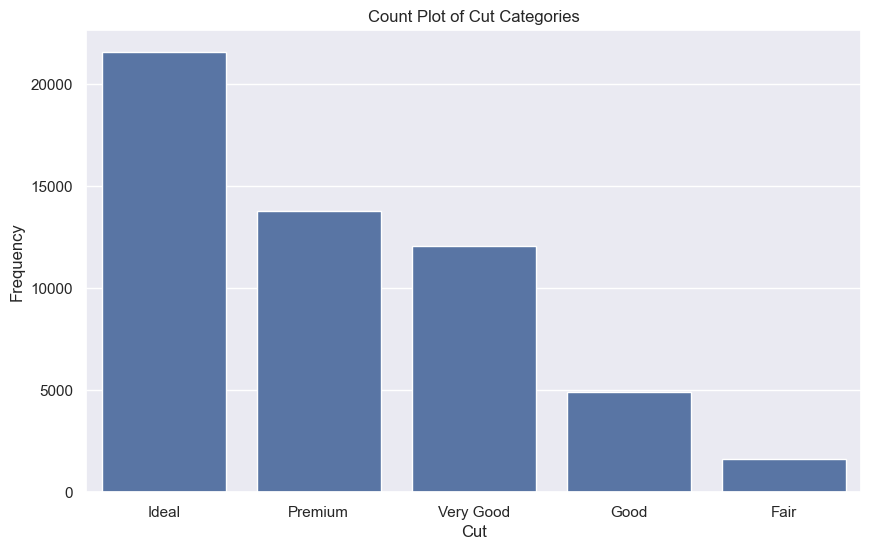

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency table for categorical variables
frequency_table = diamonds['cut'].value_counts()
print(frequency_table)

# Count plot for the 'cut' variable
plt.figure(figsize=(10, 6))
sns.countplot(data=diamonds, x='cut', order=frequency_table.index)
plt.title('Count Plot of Cut Categories')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.show()


2.2 For categorical variables: frequency table, count plot

## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

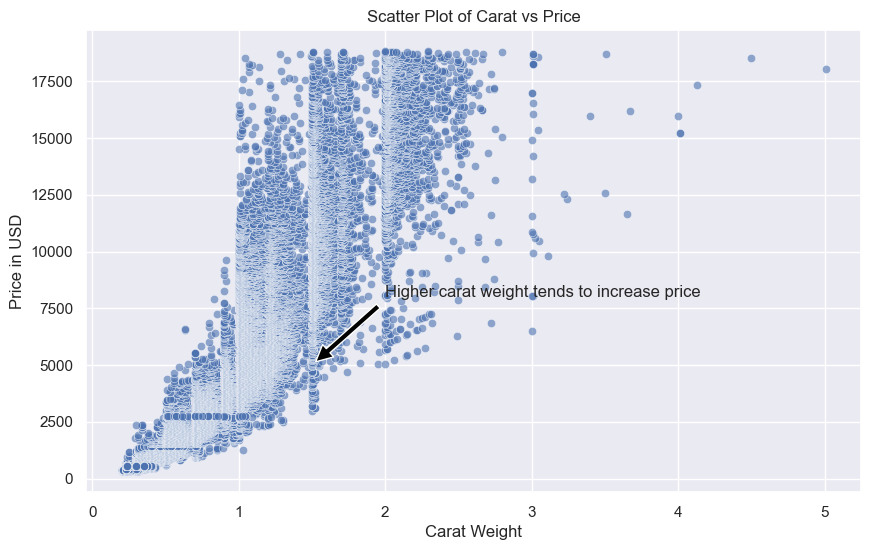

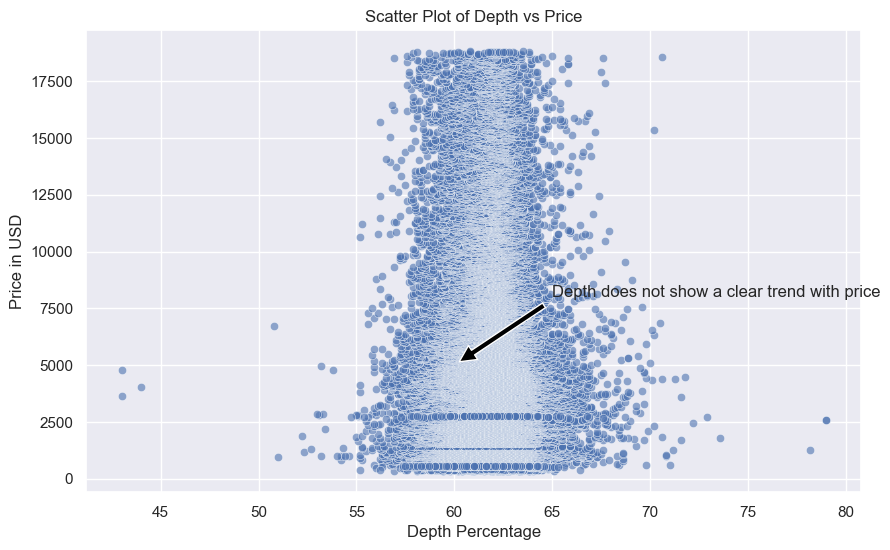

In [9]:
# Scatter plot for 'carat' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='carat', y='price', alpha=0.6)
plt.title('Scatter Plot of Carat vs Price')
plt.xlabel('Carat Weight')
plt.ylabel('Price in USD')
plt.grid(True)
plt.annotate('Higher carat weight tends to increase price', xy=(1.5, 5000), xytext=(2, 8000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Scatter plot for 'depth' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='depth', y='price', alpha=0.6)
plt.title('Scatter Plot of Depth vs Price')
plt.xlabel('Depth Percentage')
plt.ylabel('Price in USD')
plt.grid(True)
plt.annotate('Depth does not show a clear trend with price', xy=(60, 5000), xytext=(65, 8000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()



### 3.2 Categorical & Categorical: stacked column chart

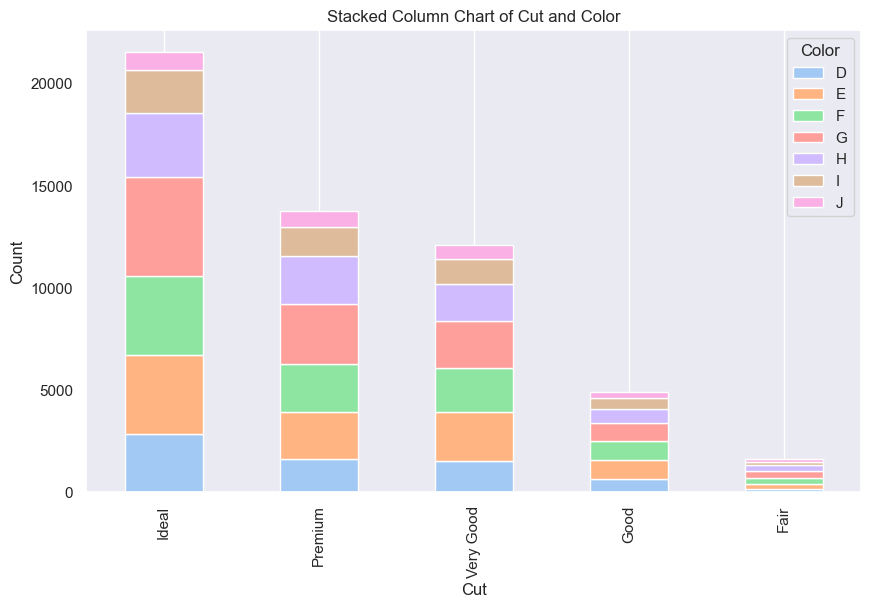

In [11]:
# Create a stacked column chart for 'cut' and 'color' with soft colors
cut_color_counts = diamonds.groupby(['cut', 'color']).size().unstack()
cut_color_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))
plt.title('Stacked Column Chart of Cut and Color')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Color')
plt.grid(axis='y')
plt.show()



### 3.3 Categorical & Continuous: boxplots

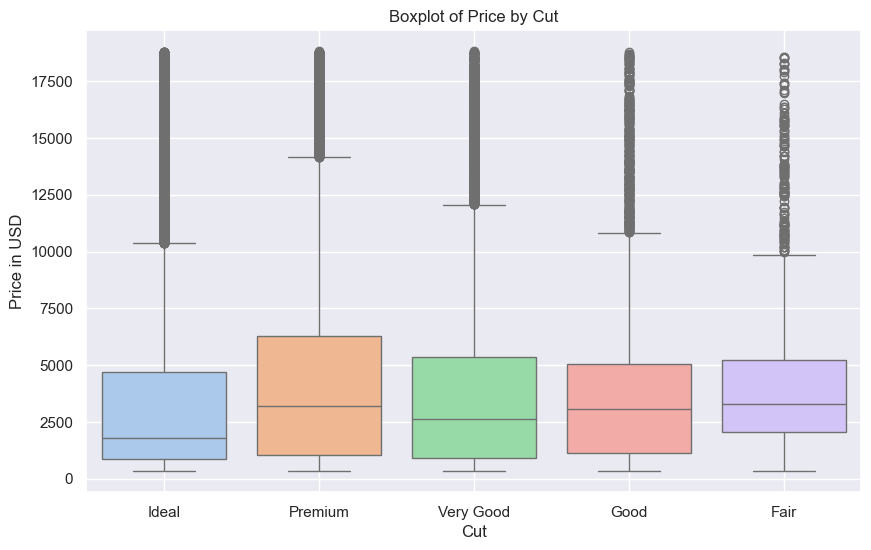

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds, x='cut', y='price', palette='pastel')
plt.title('Boxplot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()


### 3.4 Correlation Analysis: correlation matrix

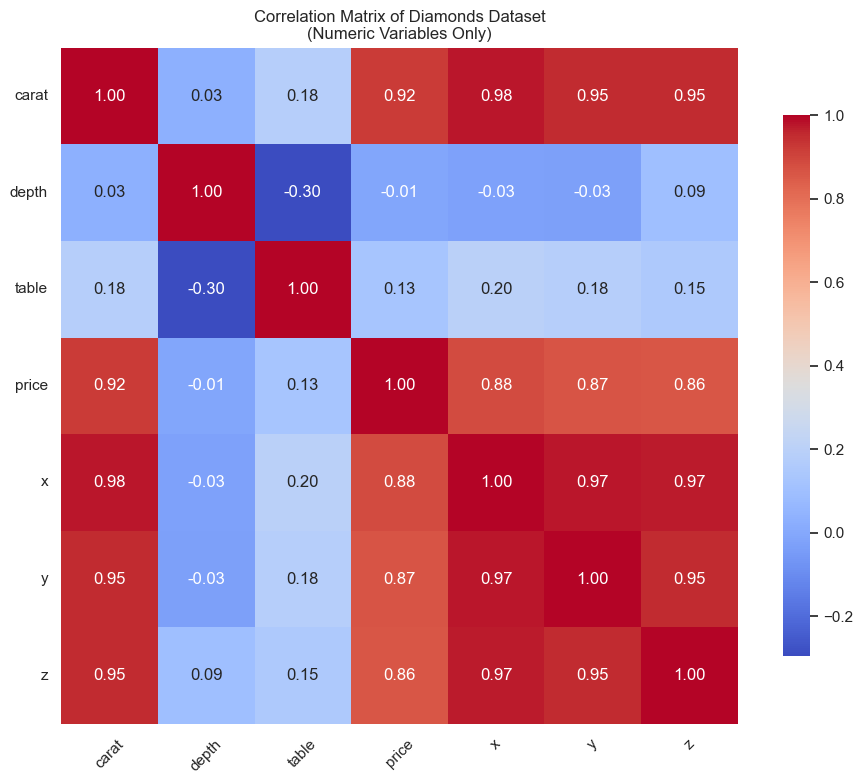


Correlations with price:
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


In [15]:
# Select specific numeric columns for correlation
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix = diamonds[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square="false", 
            cbar_kws={"shrink": .8})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation Matrix of Diamonds Dataset\n(Numeric Variables Only)')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Print correlations with price
print("\nCorrelations with price:")
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

## 4.0 Missing Value Analysis

In [16]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

Outlier counts for each numeric column:
carat: 1889
depth: 2545
table: 605
price: 3540
x: 32
y: 29
z: 49


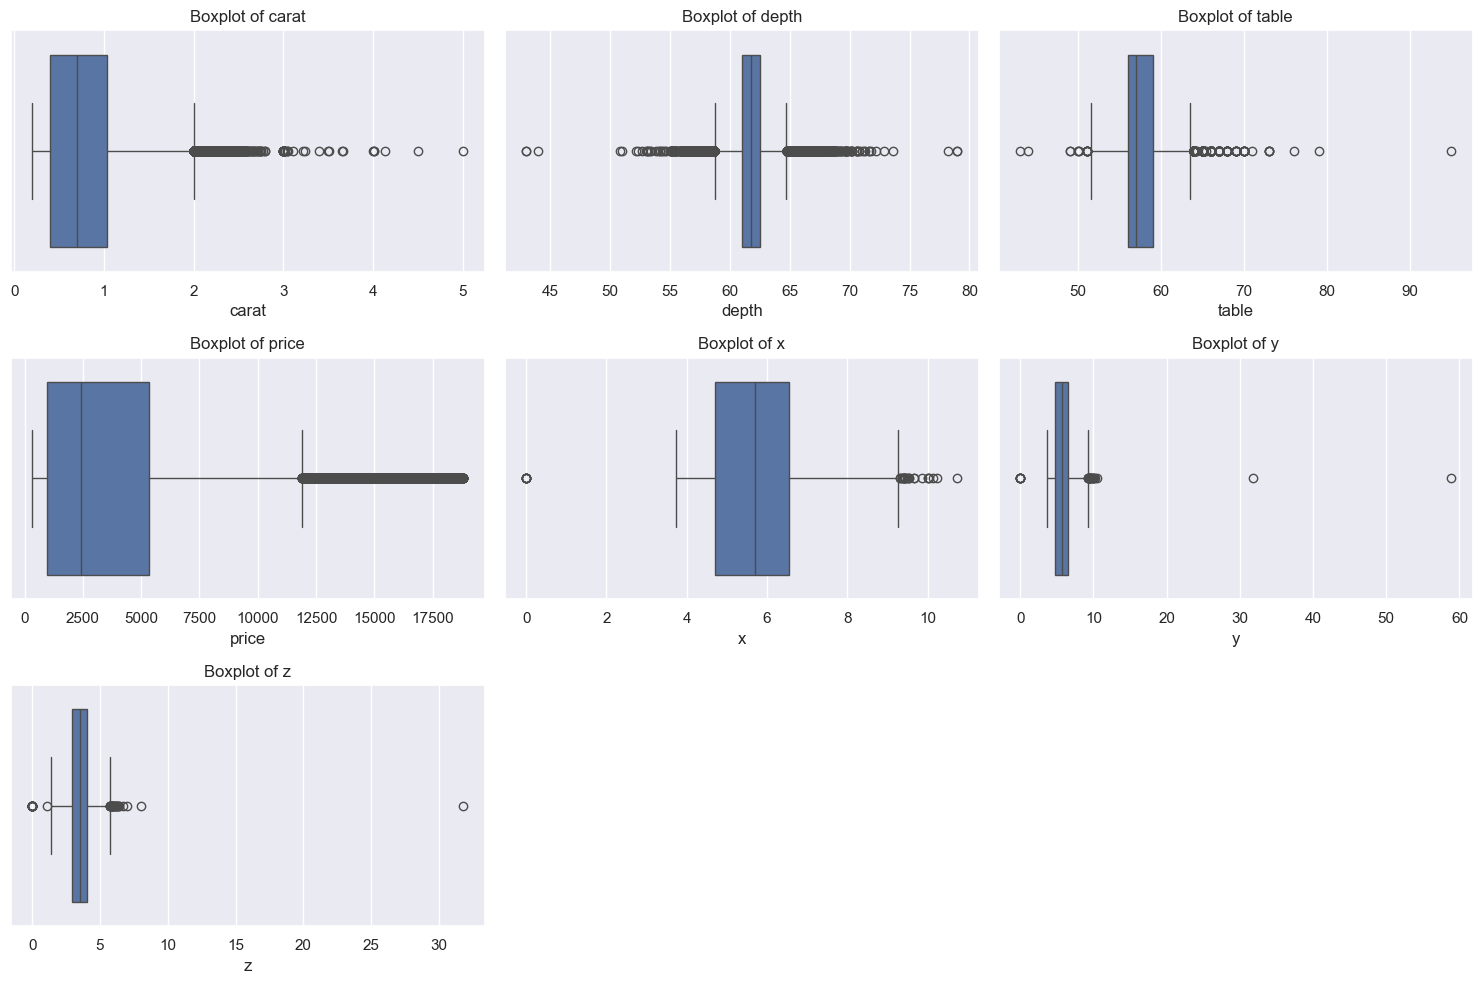

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Analyze outliers for numeric columns
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(diamonds, col)
    outlier_summary[col] = outliers.shape[0]

# Print outlier counts for each numeric column
print("Outlier counts for each numeric column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=diamonds[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [18]:
diamonds["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64